In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
df = pd.read_csv("Fashion_Sales_Data.csv")

In [3]:
df.head()

,Order ID,Order Date,Product Category,Sales,Profit,Quantity,Region,Customer Segment,Discount (%),Returned
0,1001,2023-01-01,Shirts,250,50,2,North,Retail,10,No
1,1002,2023-01-16,Jeans,400,80,3,South,Wholesale,5,Yes
2,1003,2023-01-31,Shoes,600,120,5,East,Online,15,No
3,1004,2023-02-15,Accessories,150,20,1,West,Retail,0,No
4,1005,2023-03-02,Shirts,300,60,2,North,Retail,5,Yes


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          20 non-null     int64 
 1   Order Date        20 non-null     object
 2   Product Category  20 non-null     object
 3   Sales             20 non-null     int64 
 4   Profit            20 non-null     int64 
 5   Quantity          20 non-null     int64 
 6   Region            20 non-null     object
 7   Customer Segment  20 non-null     object
 8   Discount (%)      20 non-null     int64 
 9   Returned          20 non-null     object
dtypes: int64(5), object(5)
memory usage: 1.7+ KB


In [5]:
df.isnull().sum()

Order ID            0
Order Date          0
Product Category    0
Sales               0
Profit              0
Quantity            0
Region              0
Customer Segment    0
Discount (%)        0
Returned            0
dtype: int64

In [6]:
df.describe()

,Order ID,Sales,Profit,Quantity,Discount (%)
count,20.00000,20.000000,20.000000,20.000000,20.000000
mean,1010.50000,390.000000,73.850000,3.300000,8.000000
std,5.91608,183.962239,35.931624,1.657519,6.569467
min,1001.00000,150.000000,20.000000,1.000000,0.000000
25%,1005.75000,245.000000,47.500000,2.000000,3.750000
50%,1010.50000,355.000000,72.500000,3.000000,7.500000
75%,1015.25000,525.000000,102.500000,5.000000,11.250000
max,1020.00000,700.000000,130.000000,6.000000,20.000000


In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [8]:
df['Month'] = df['Order Date'].dt.month_name()

In [9]:
df[['Order Date', 'Month']].head()

,Order Date,Month
0,2023-01-01,January
1,2023-01-16,January
2,2023-01-31,January
3,2023-02-15,February
4,2023-03-02,March


In [10]:
df.groupby('Product Category')['Sales'].sum().sort_values(ascending=False)


Product Category
Shoes          3240
Jeans          2240
Shirts         1390
Accessories     930
Name: Sales, dtype: int64

In [11]:
df.groupby('Region')['Profit'].sum().sort_values(ascending=False)


Region
East     600
South    450
North    282
West     145
Name: Profit, dtype: int64

In [12]:
df.groupby('Month')['Sales'].sum().sort_values(ascending=True)


Month
February      150
October       210
August        420
June          540
March         750
April         880
July         1100
September    1110
January      1250
May          1390
Name: Sales, dtype: int64

In [13]:
df.groupby('Discount (%)')['Sales'].mean().sort_values(ascending=False)


Discount (%)
20    695.000000
15    576.666667
10    442.000000
5     308.000000
0     186.000000
Name: Sales, dtype: float64

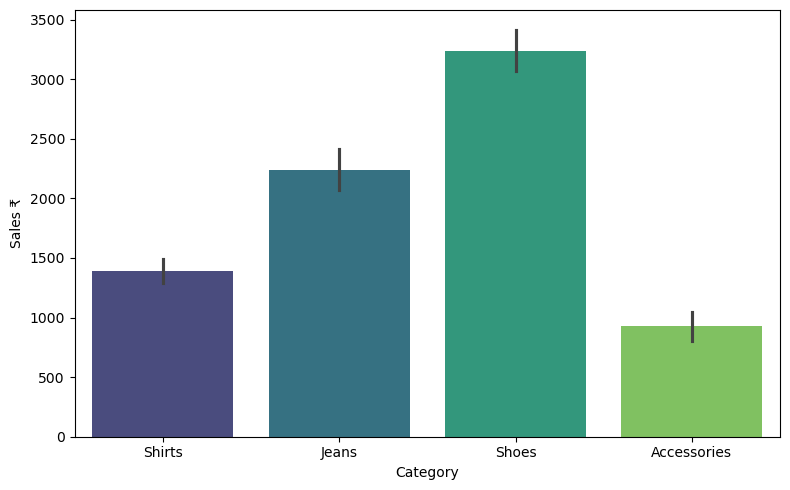

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Product Category', y='Sales', estimator=sum, palette='viridis', hue=None)
plt.ylabel("Sales ₹")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

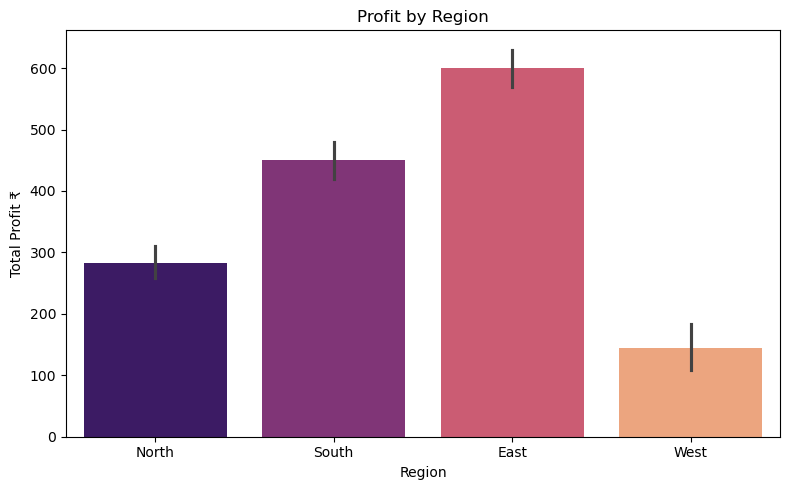

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Region', y='Profit', estimator=sum, palette='magma')
plt.title("Profit by Region")
plt.ylabel("Total Profit ₹")
plt.tight_layout()
plt.show()

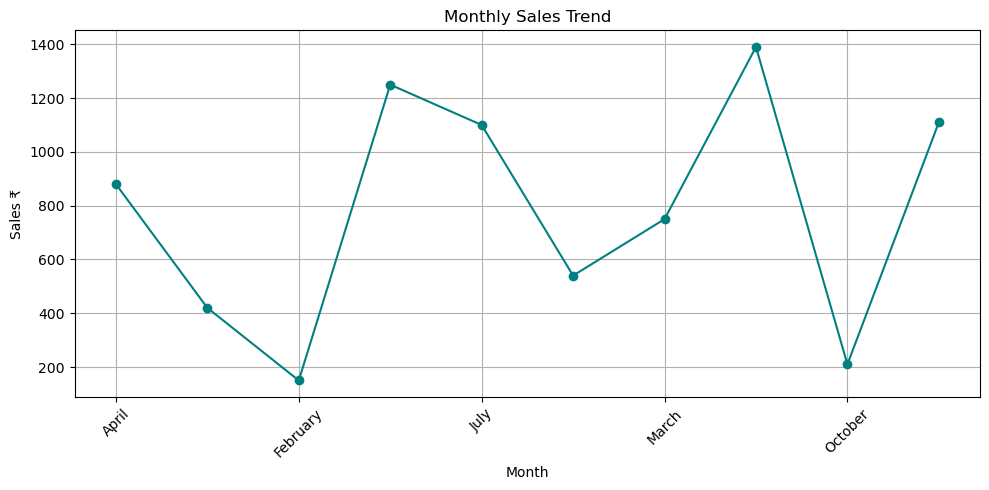

In [16]:
monthly_sales = df.groupby('Month')['Sales'].sum().sort_index()

plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales ₹")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


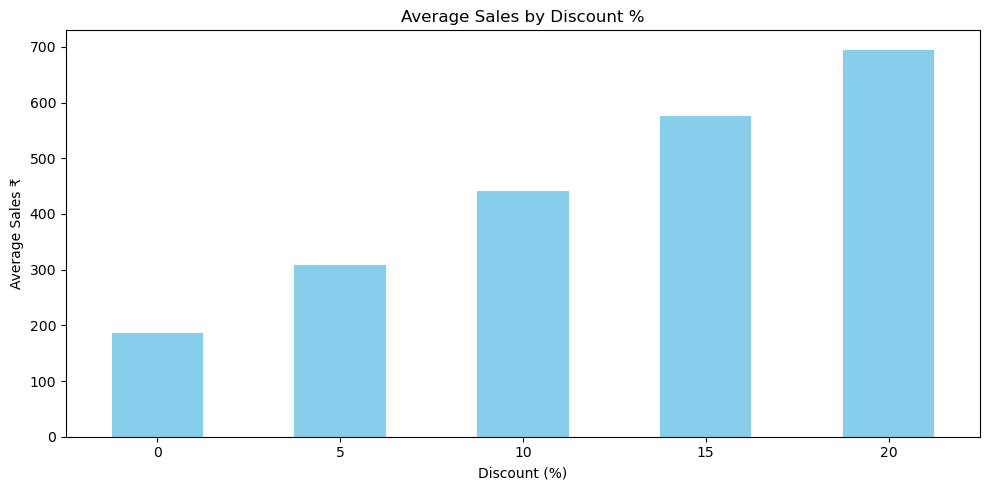

In [17]:
discount_avg = df.groupby('Discount (%)')['Sales'].mean()

plt.figure(figsize=(10,5))
discount_avg.plot(kind='bar', color='skyblue')
plt.title("Average Sales by Discount %")
plt.ylabel("Average Sales ₹")
plt.xlabel("Discount (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
